<a href="https://colab.research.google.com/github/PrabhasKS/Brain-Tumor-Detection/blob/main/DL_Brain_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, shutil
import cv2
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
print("Brain Tumor Detection-Project DLL \n All the necessary dependecies installed successfully😊")





Brain Tumor Detection-Project DLL 
 All the necessary dependecies installed successfully😊


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Dataset
import zipfile
z = zipfile.ZipFile('archive (2).zip')
z.extractall()

In [ ]:
folder = "brain_tumor_dataset/yes/"
count = 1
for filename in os.listdir(folder):
    source = folder + filename
    destination = folder + "Y_" + str(count) + ".jpg"
    print(f"Source: {source}, Destination: {destination}")
    os.rename(source, destination)
    count += 1
print("All files are renamed in the yes dir")


Source: brain_tumor_dataset/yes/Y22.jpg, Destination: brain_tumor_dataset/yes/Y_1.jpg
Source: brain_tumor_dataset/yes/Y102.jpg, Destination: brain_tumor_dataset/yes/Y_2.jpg
Source: brain_tumor_dataset/yes/Y32.jpg, Destination: brain_tumor_dataset/yes/Y_3.jpg
Source: brain_tumor_dataset/yes/Y257.jpg, Destination: brain_tumor_dataset/yes/Y_4.jpg
Source: brain_tumor_dataset/yes/Y111.JPG, Destination: brain_tumor_dataset/yes/Y_5.jpg
Source: brain_tumor_dataset/yes/Y116.JPG, Destination: brain_tumor_dataset/yes/Y_6.jpg
Source: brain_tumor_dataset/yes/Y26.jpg, Destination: brain_tumor_dataset/yes/Y_7.jpg
Source: brain_tumor_dataset/yes/Y163.JPG, Destination: brain_tumor_dataset/yes/Y_8.jpg
Source: brain_tumor_dataset/yes/Y254.jpg, Destination: brain_tumor_dataset/yes/Y_9.jpg
Source: brain_tumor_dataset/yes/Y65.JPG, Destination: brain_tumor_dataset/yes/Y_10.jpg
Source: brain_tumor_dataset/yes/Y252.jpg, Destination: brain_tumor_dataset/yes/Y_11.jpg
Source: brain_tumor_dataset/yes/Y192.JPG, Des

In [ ]:
folder = "brain_tumor_dataset/no/"
count = 1
for filename in os.listdir(folder):
    source = folder + filename
    destination = folder + "N_" + str(count) + ".jpg"
    print(f"Source: {source}, Destination: {destination}")
    os.rename(source, destination)
    count += 1
print("All files are renamed in the no dir")

Source: brain_tumor_dataset/no/33 no.jpg, Destination: brain_tumor_dataset/no/N_1.jpg
Source: brain_tumor_dataset/no/24 no.jpg, Destination: brain_tumor_dataset/no/N_2.jpg
Source: brain_tumor_dataset/no/38 no.jpg, Destination: brain_tumor_dataset/no/N_3.jpg
Source: brain_tumor_dataset/no/N26.JPG, Destination: brain_tumor_dataset/no/N_4.jpg
Source: brain_tumor_dataset/no/no 6.jpg, Destination: brain_tumor_dataset/no/N_5.jpg
Source: brain_tumor_dataset/no/4 no.jpg, Destination: brain_tumor_dataset/no/N_6.jpg
Source: brain_tumor_dataset/no/12 no.jpg, Destination: brain_tumor_dataset/no/N_7.jpg
Source: brain_tumor_dataset/no/N15.jpg, Destination: brain_tumor_dataset/no/N_8.jpg
Source: brain_tumor_dataset/no/36 no.jpg, Destination: brain_tumor_dataset/no/N_9.jpg
Source: brain_tumor_dataset/no/8 no.jpg, Destination: brain_tumor_dataset/no/N_10.jpg
Source: brain_tumor_dataset/no/2 no.jpeg, Destination: brain_tumor_dataset/no/N_11.jpg
Source: brain_tumor_dataset/no/no 8.jpg, Destination: brain

In [ ]:
#Exploratory Data analysis (EDA)

listyes = os.listdir("brain_tumor_dataset/yes/")
number_file_yes = len(listyes)
print(number_file_yes)


listno = os.listdir("brain_tumor_dataset/no/")
number_file_no = len(listno)
print(number_file_no)


155
98


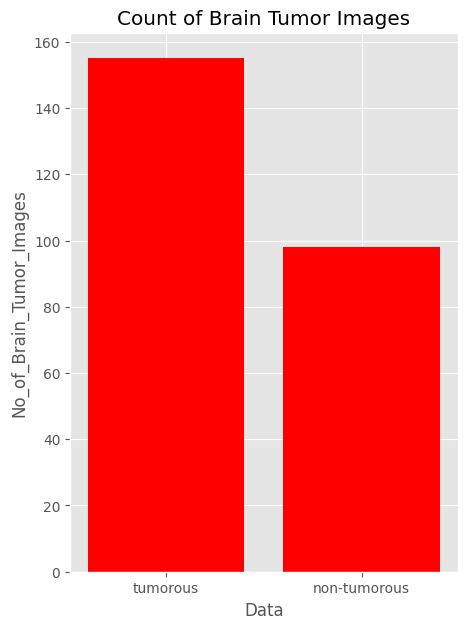

In [ ]:
#plot

data ={'tumorous': number_file_yes, 'non-tumorous':number_file_no}
typex = data.keys()
values = data.values()

fig = plt.figure(figsize =(5,7))
plt.bar(typex,values,color="red")
plt.xlabel("Data")
plt.ylabel("No_of_Brain_Tumor_Images")
plt.title("Count of Brain Tumor Images")
plt.show()


In [ ]:
#Data Augumentation

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau




In [ ]:
def timing(sec_elapsed):
    h = int(sec_elapsed / (60*60))
    m =int(sec_elapsed % (60*60)/60)
    s =sec_elapsed % 60
    return f"{h}:{m}:{s}"


In [ ]:
def augumented_data(file_dir , n_generated_sample , save_to_dir):
    data_gen = ImageDataGenerator(rotation_range = 10,width_shift_range = 0.1,height_shift_range = 0.1, shear_range=0.1,brightness_range=(0.3,1.0),horizontal_flip = True,vertical_flip=True, fill_mode='nearest')
    for filename in os.listdir(file_dir):
        image = cv2.imread(file_dir + '/' +filename)
        image = image.reshape((1,) + image.shape)
        save_prefix = 'aug_' +filename[:-4]
        i=0
        for batch in data_gen.flow(x=image,batch_size =1,save_to_dir= save_to_dir, save_prefix = save_prefix, save_format = "jpg"):
            i+=1
            if i>n_generated_sample:
                break


In [ ]:
import time
start_time = time.time()

yes_path = 'brain_tumor_dataset/yes/'
no_path = 'brain_tumor_dataset/no/'

augmented_data_path = 'augmented_data/'
augumented_data(file_dir = yes_path , n_generated_sample =6 ,save_to_dir =augmented_data_path +'yes' )
augumented_data(file_dir = no_path , n_generated_sample =9 ,save_to_dir =augmented_data_path +'no' )
end_time =time.time()
execution_time = end_time - start_time
print(timing(execution_time))

FileNotFoundError: [Errno 2] No such file or directory: 'augmented_data/yes/aug_Y_10_0_2386.jpg'

In [ ]:
def data_summary(main_path):
    yes_path ="augmented_data/yes/"
    no_path = "augmented_data/no/"
    n_pos=len(os.listdir(yes_path))
    n_neg=len(os.listdir(no_path))

    n = (n_pos + n_neg)
    pos_per = (n_pos*100)/n
    neg_per = (n_neg*100)/n

    print(f"Number of sample {n}")
    print(f"{n_pos} Number of positive sample in percentage: {pos_per}%")
    print(f"{n_neg} Number of Negetive sample in percentage: {neg_per}%")


In [ ]:
data_summary(augmented_data_path)

In [ ]:
#Exploratory Data analysis (EDA)

listyes = os.listdir("augmented_data/yes//")
number_file_yes = len(listyes)
print(number_file_yes)


listno = os.listdir("augmented_data/no/")
number_file_no = len(listno)
print(number_file_no)

In [ ]:
#plot

data ={'tumorous': number_file_yes, 'non-tumorous':number_file_no}
typex = data.keys()
values = data.values()

fig = plt.figure(figsize =(5,7))
plt.bar(typex,values,color="red")
plt.xlabel("Data")
plt.ylabel("No_of_Brain_Tumor_Images")
plt.title("Count of Brain Tumor Images")
plt.show()

In [ ]:
# DATA Preprocessing
# Convert BGR to Gray
# GuassianBlur
# Erode
#Dialate
#Find Contours

In [ ]:
import imutils
def crop_brain_tumor(image , plot=False):
    gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    gray=cv2.GaussianBlur(gray, (5,5) ,0)

    thres = cv2.threshold(gray ,45 ,255, cv2.THRESH_BINARY)[1]
    thres = cv2.erode(thres , None , iterations =2)
    thres = cv2.dilate(thres , None , iterations =2)

    cnts = cv2.findContours(thres.copy() , cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts , key = cv2.contourArea)

    extLeft = tuple(c[c[:,:,0].argmin()][0])
    extRight = tuple(c[c[:,:,0].argmax()][0])
    extTop = tuple(c[c[:,:,1].argmin()][0])
    extBot = tuple(c[c[:,:,1].argmax()][0])

    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]

    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(image)

        plt.tick_params(axis='both', which='both',
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)

        plt.title('Original Image')

        plt.subplot(1, 2, 2)
        plt.imshow(new_image)

        plt.tick_params(axis='both', which='both',
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)

        plt.title('Cropped Image')
        plt.show()
    return new_image

In [ ]:
img = cv2.imread('augmented_data/yes/aug_Y_1_0_363.jpg')
crop_brain_tumor(img ,True)

In [ ]:
img = cv2.imread('augmented_data/no/aug_N_1_0_1439.jpg')
crop_brain_tumor(img ,True)

In [ ]:
# https://youtu.be/-zmBMxpNDqQ?si=OQ2B8mpYHw5to3oJ
# 1:02:43
#https://github.com/Chando0185/Advance_Brain_Tumor_Classification/tree/main

In [ ]:
folder1 = 'augmented_data/no/'
folder2 = 'augmented_data/yes/'

for filename in os.listdir(folder1):
    img = cv2.imread(folder1 + filename)
    img = crop_brain_tumor(img, False)
    cv2.imwrite(folder1 + filename, img)
for filename in os.listdir(folder2):
    img = cv2.imread(folder2 + filename)
    img = crop_brain_tumor(img, False)
    cv2.imwrite(folder2 + filename, img)

In [ ]:
#image loding
from sklearn.utils import shuffle
def load_data(dir_list, image_size):
    X= []
    y=[]

    image_width, image_height = image_size
    for directory in dir_list:
        for filename in os.listdir(directory):
            image=cv2.imread(directory + '/' +filename)
            image=crop_brain_tumor(image, plot=False)
            image=cv2.resize(image,dsize=(image_width, image_height), interpolation = cv2.INTER_CUBIC)
            image = image/255.00
            X.append(image)
            if directory[-3:] == "yes":
                y.append(1)
            else:
                y.append(0)

    X= np.array(X)
    y = np.array(y)
    X,y = shuffle(X,y)
    print(f"Number of example is :{len(X)}")
    print(f"X shape is : {X.shape}")
    print(f"y shape is : {y.shape}")
    return X,y





In [ ]:
import os
augmented_path = 'augmented_data/'
augmented_yes = augmented_path + 'yes'
augmented_no = augmented_path + 'no'

IMAGE_WIDTH , IMAGE_HEIGHT = (240,240)

X,y = load_data([augmented_yes,augmented_no], (IMAGE_WIDTH , IMAGE_HEIGHT))

In [ ]:
def plot_sample_images(X, y, n=50):

    for label in [0,1]:
        images = X[np.argwhere(y == label)]
        n_images = images[:n]

        columns_n = 10
        rows_n = int(n/ columns_n)

        plt.figure(figsize=(20, 10))

        i = 1
        for image in n_images:
            plt.subplot(rows_n, columns_n, i)
            plt.imshow(image[0])

            plt.tick_params(axis='both', which='both',
                            top=False, bottom=False, left=False, right=False,
                            labelbottom=False, labeltop=False, labelleft=False,
                            labelright=False)

            i += 1

        label_to_str = lambda label: "Yes" if label == 1 else "No"
        plt.suptitle(f"Brain Tumor: {label_to_str(label)}")
        plt.show()

In [ ]:
plot_sample_images(X,y)

In [ ]:
#DATA SPLITTING
#TRAIN TEST VALIDATION

In [ ]:
if not os.path.isdir('tumorous_and_nontumorous'):
    base_dir = 'tumorous_and_nontumorous'
    os.mkdir(base_dir)

In [ ]:
if not os.path.isdir('tumorous_and_nontumorous/train'):
    train_dir = os.path.join(base_dir , 'train')
    os.mkdir(train_dir)
if not os.path.isdir('tumorous_and_nontumorous/test'):
    test_dir = os.path.join(base_dir , 'test')
    os.mkdir(test_dir)
if not os.path.isdir('tumorous_and_nontumorous/valid'):
    valid_dir = os.path.join(base_dir , 'valid')
    os.mkdir(valid_dir)

In [ ]:
if not os.path.isdir('tumorous_and_nontumorous/train/tumorous'):
    infected_train_dir = os.path.join(train_dir, 'tumorous')
    os.mkdir(infected_train_dir)
if not os.path.isdir('tumorous_and_nontumorous/test/tumorous'):
    infected_test_dir = os.path.join(test_dir, 'tumorous')
    os.mkdir(infected_test_dir)
if not os.path.isdir('tumorous_and_nontumorous/valid/tumorous'):
    infected_valid_dir = os.path.join(valid_dir, 'tumorous')
    os.mkdir(infected_valid_dir)

In [ ]:
if not os.path.isdir('tumorous_and_nontumorous/train/nontumorous'):
    healthy_train_dir = os.path.join(train_dir, 'nontumorous')
    os.mkdir(healthy_train_dir)
if not os.path.isdir('tumorous_and_nontumorous/test/nontumorous'):
    healthy_test_dir = os.path.join(test_dir, 'nontumorous')
    os.mkdir(healthy_test_dir)
if not os.path.isdir('tumorous_and_nontumorous/valid/nontumorous'):
    healthy_valid_dir = os.path.join(valid_dir, 'nontumorous')
    os.mkdir(healthy_valid_dir)

In [ ]:
original_dataset_tumorours = os.path.join('augmented_data','yes/')
original_dataset_nontumorours = os.path.join('augmented_data','no/')

In [ ]:
files = os.listdir('augmented_data/yes/')
fnames = []
for i in range(0,759):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_tumorours, fname)
    dst = os.path.join(infected_train_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
files = os.listdir('augmented_data/yes/')
fnames = []
for i in range(759,922):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_tumorours, fname)
    dst = os.path.join(infected_test_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
files = os.listdir('augmented_data/yes/')
fnames = []
for i in range(922,1084):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_tumorours, fname)
    dst = os.path.join(infected_valid_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
# 80 10 10

In [ ]:
files = os.listdir('augmented_data/no/')
fnames = []
for i in range(0,686):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_nontumorours, fname)
    dst = os.path.join(healthy_train_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
files = os.listdir('augmented_data/no/')
fnames = []
for i in range(686,833):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_nontumorours, fname)
    dst = os.path.join(healthy_test_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
files = os.listdir('augmented_data/no/')
fnames = []
for i in range(833,979):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_nontumorours, fname)
    dst = os.path.join(healthy_valid_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
# MODEL BUILDING

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                  horizontal_flip=0.4,
                  vertical_flip=0.4,
                  rotation_range=40,
                  shear_range=0.2,
                  width_shift_range=0.4,
                  height_shift_range=0.4,
                  fill_mode='nearest')
test_data_gen = ImageDataGenerator(rescale=1.0/255)
valid_data_gen = ImageDataGenerator(rescale=1.0/255)

In [ ]:
train_generator = train_datagen.flow_from_directory('tumorous_and_nontumorous/train/', batch_size=32, target_size=(240,240), class_mode='categorical',shuffle=True, seed = 42, color_mode = 'rgb')

In [ ]:
test_generator = train_datagen.flow_from_directory('tumorous_and_nontumorous/test/', batch_size=32, target_size=(240,240), class_mode='categorical',shuffle=True, seed = 42, color_mode = 'rgb')

In [ ]:
valid_generator = train_datagen.flow_from_directory('tumorous_and_nontumorous/valid/', batch_size=32, target_size=(240,240), class_mode='categorical',shuffle=True, seed = 42, color_mode = 'rgb')

In [ ]:
class_labels = train_generator.class_indices
class_name = {value: key for (key,value) in class_labels.items()}

In [ ]:
class_name

In [ ]:
base_model = VGG19(input_shape = (240,240,3), include_top=False, weights='imagenet')

for layer in base_model.layers:
    layer.trainable=False

x=base_model.output
flat = Flatten()(x)

class_1 = Dense(4608, activation = 'relu')(flat)
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation = 'relu')(drop_out)
output = Dense(2, activation = 'softmax')(class_2)

model_01 = Model(base_model.input, output)
model_01.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional"

In [ ]:
# callback
filepath = 'model.keras'
es = EarlyStopping(monitor='val_loss', verbose = 1, mode='min',patience=4)
cp = ModelCheckpoint(filepath, monitor='val_loss', verbose = 1, save_best_only=True, save_weights_only=False, mode='auto',save_freq='epoch')
lrr = ReduceLROnPlateau(monitor='val_accuarcy', patience=3, verbose = 1, factor = 0.5, min_lr = 0.0001)

In [ ]:
sgd = SGD(learning_rate=0.0001, decay = 1e-6, momentum = 0.9, nesterov = True)
model_01.compile(loss='categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])

In [ ]:
history_01 = model_01.fit(train_generator, steps_per_epoch=10, epochs = 2, callbacks=[es,cp,lrr], validation_data=valid_generator)

NameError: name 'model_01' is not defined

In [ ]:
# Plot performance
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
fig.suptitle("Model Training (Frozen CNN)", fontsize=12)
max_epoch = len(history_01.history['accuracy'])+1
epochs_list = list(range(1, max_epoch))

ax1.plot(epochs_list, history_01.history['accuracy'], color='b', linestyle='-', label='Training Data')
ax1.plot(epochs_list, history_01.history['val_accuracy'], color='r', linestyle='-', label='Validation Data')
ax1.set_title('Training Accuracy', fontsize=12)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend(frameon=False, loc='lower center', ncol=2)

ax2.plot(epochs_list, history_01.history['loss'], color='b', linestyle='-', label='Training Data')
ax2.plot(epochs_list, history_01.history['val_loss'], color='r', linestyle='-', label='Validation Data')
ax2.set_title('Training Loss', fontsize=12)
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(frameon=False, loc='upper center', ncol=2)
plt.savefig("training_frozencnn.jpeg", format='jpeg', dpi=100, bbox_inches='tight')

In [ ]:
import os

# Create directory if it does not exist
if not os.path.isdir('model_weights/'):
    os.mkdir('model_weights/')

# Save weights with the correct file extension
model_01.save_weights(filepath="model_weights/vgg19_model_01.weights.h5", overwrite=True)


In [ ]:
model_01.load_weights("model_weights/vgg19_model_01.weights.h5")
vgg_val_eval_01 = model_01.evaluate(valid_generator)
vgg_test_eval_01 = model_01.evaluate(test_generator)

In [ ]:
print(f'Validation Loss: {vgg_val_eval_01[0]}')
print(f'Validation Acc: {vgg_val_eval_01[1]}')
print(f'Testing Loss: {vgg_test_eval_01[0]}')
print(f'Testing Acc: {vgg_test_eval_01[1]}')

In [ ]:
filenames = test_generator.filenames
nb_sample = len(filenames)

vgg_prediction_01 = model_01.predict(test_generator, steps=nb_sample, verbose = 1)
y_pred = np.argmax(vgg_prediction_01, axis=1)

In [ ]:

base_model = VGG19(include_top=False, input_shape=(240,240,3))
base_model_layer_names = [layer.name for layer in base_model.layers]
base_model_layer_names

In [ ]:
base_model = VGG19(include_top=False, input_shape=(240,240,3))
base_model_layer_names = [layer.name for layer in base_model.layers]
base_model_layer_names

x=base_model.output
flat = Flatten()(x)

class_1 = Dense(4608, activation = 'relu')(flat)
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation = 'relu')(drop_out)
output = Dense(2, activation = 'softmax')(class_2)

model_02 = Model(base_model.inputs, output)
model_02.load_weights("model_weights/vgg19_model_01.weights.h5")

set_trainable=False
for layer in base_model.layers:
    if layer.name in ['block5_conv4','block5_conv3']:
        set_trainable=True
    if set_trainable:
        layer.trainable=True
    else:
        layer.trainable=False

print(model_02.summary())

In [ ]:
sgd = SGD(learning_rate=0.0001, decay = 1e-6, momentum = 0.9, nesterov = True)
model_02.compile(loss='categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])

In [ ]:
history_02 = model_02.fit(train_generator, steps_per_epoch=10, epochs = 2, callbacks=[es,cp,lrr], validation_data=valid_generator)

In [ ]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
fig.suptitle("Model Training (Frozen CNN)", fontsize=12)
max_epoch = len(history_01.history['accuracy'])+1
epochs_list = list(range(1, max_epoch))

ax1.plot(epochs_list, history_02.history['accuracy'], color='b', linestyle='-', label='Training Data')
ax1.plot(epochs_list, history_02.history['val_accuracy'], color='r', linestyle='-', label='Validation Data')
ax1.set_title('Training Accuracy', fontsize=12)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend(frameon=False, loc='lower center', ncol=2)

ax2.plot(epochs_list, history_02.history['loss'], color='b', linestyle='-', label='Training Data')
ax2.plot(epochs_list, history_02.history['val_loss'], color='r', linestyle='-', label='Validation Data')
ax2.set_title('Training Loss', fontsize=12)
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(frameon=False, loc='upper center', ncol=2)
plt.savefig("training_frozencnn.jpeg", format='jpeg', dpi=100, bbox_inches='tight')

In [ ]:
if not os.path.isdir('model_weights/'):
    os.mkdir('model_weights/')
model_02.save_weights(filepath="model_weights/vgg19_model_02.weights.h5", overwrite=True)

In [ ]:

model_02.load_weights("model_weights/vgg19_model_02.weights.h5")
vgg_val_eval_02 = model_02.evaluate(valid_generator)
vgg_test_eval_02 = model_02.evaluate(test_generator)

In [ ]:
base_model = VGG19(include_top=False, input_shape=(240,240,3))
base_model_layer_names = [layer.name for layer in base_model.layers]
base_model_layer_names

x=base_model.output
flat = Flatten()(x)

class_1 = Dense(4608, activation = 'relu')(flat)
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation = 'relu')(drop_out)
output = Dense(2, activation = 'softmax')(class_2)

model_03 = Model(base_model.inputs, output)
model_03.load_weights("model_weights/vgg19_model_02.weights.h5")

sgd = SGD(learning_rate=0.0001, decay = 1e-6, momentum = 0.9, nesterov = True)
model_03.compile(loss='categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])

In [ ]:

model_03.summary()

In [ ]:
history_03 = model_03.fit(train_generator, steps_per_epoch=10, epochs = 2, callbacks=[es,cp,lrr], validation_data=valid_generator)

In [ ]:
# Save weights
if not os.path.exists("model_weights/"):
    os.mkdir("model_weights/")
model_03.save_weights("model_weights/vgg_unfrozen.weights.h5")

# Load weights
model_03.load_weights("model_weights/vgg_unfrozen.weights.h5")

# Evaluate
vgg_val_eval_03 = model_03.evaluate(valid_generator)
vgg_test_eval_03 = model_03.evaluate(test_generator)
